                                        Urban Sound Classification

In [21]:


#Importing required libraries
import pandas as pd
import os
import librosa
import librosa.display
import pickle
from scipy.io import wavfile as wav
import numpy as np
import soundfile as sf
import tensorflow as tf    
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import IPython.display as ipd
from IPython.display import Image
import matplotlib.pyplot as plt


In [51]:

os.system("clr")

# Set the path to the full UrbanSound dataset 
fulldatasetpath = r'C:\Users\swbatta\Documents\Urban Sound Classification\Data'
train = pd.read_csv(fulldatasetpath + r'\train.csv')
test = pd.read_csv(fulldatasetpath + r'\test.csv')

In [ ]:
#***exploratory data analysis

#Class distributions

print(train.Class.value_counts())


# How are sound waves digitized?

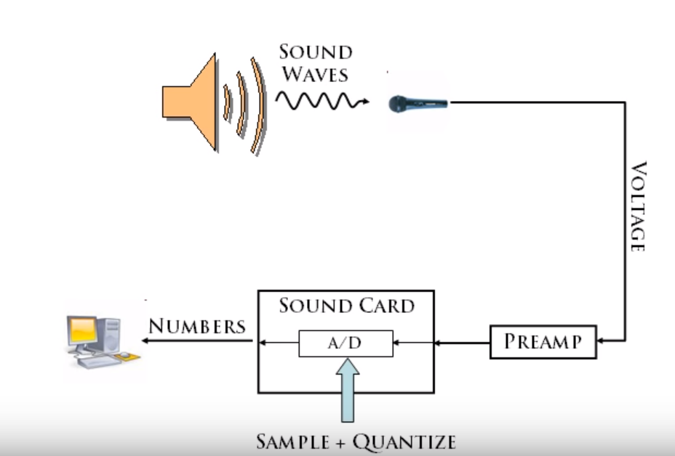

In [11]:
Image("Pictures/USC-1.png",width=400, height=400)

# Audio signal properties:

Audio channels: Mono or Stereo

Sample Rate: 8kHz – 96kHz

Bit Depth: 4 bit – 32 bit

#### Sampling

Sampling in Signal processing is the reduction a continuous time signal to a discrete time signal. Sample rate is the rate at which the signal is sampled.

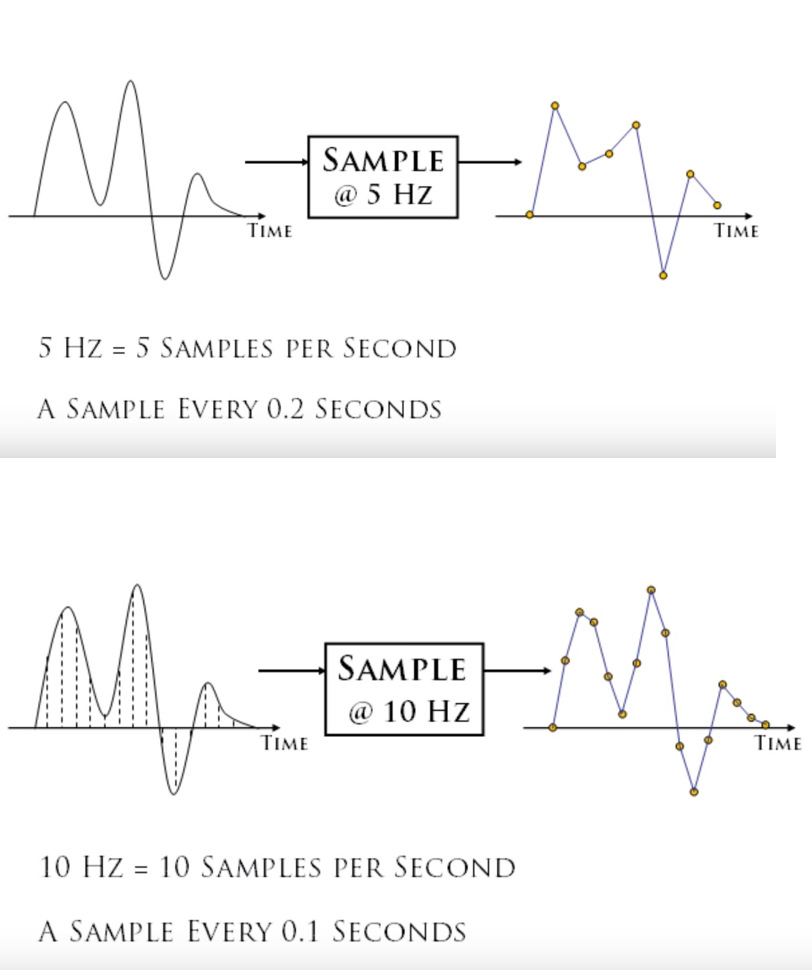

In [12]:

Image("Pictures/USC-2.png",width=400, height=400)


#### Bit depth
The instantaneous amplitude of the analog signal at each sampling is rounded off to the nearest of several specific, predetermined levels. This process is called quantization. The number of levels is always a power of 2 -- for example, 8, 16, 32, or 64.

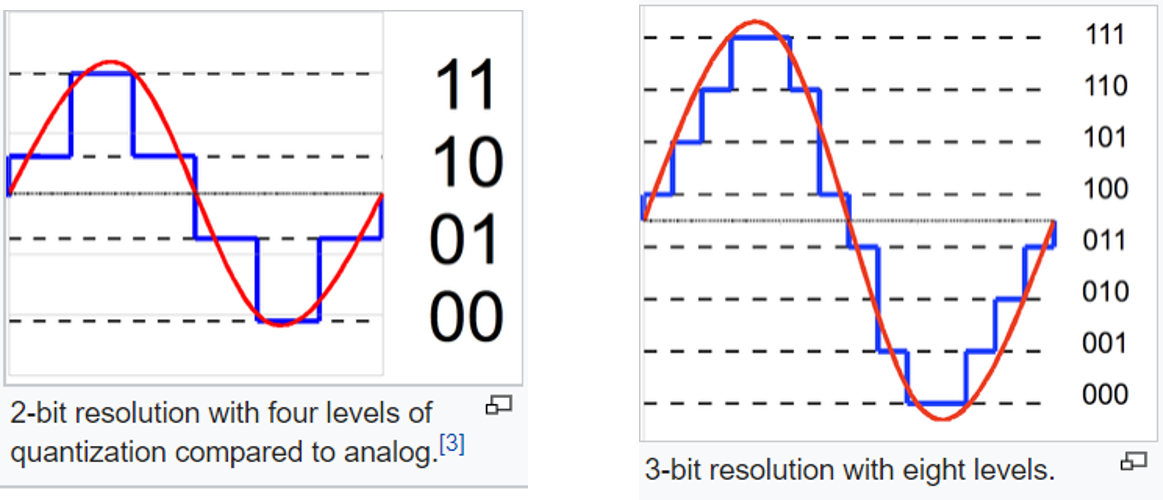

In [13]:
Image("Pictures/USC-3.png",width=400, height=400)


In [14]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)


In [5]:
wavfilehelper = WavFileHelper()


def properties(data,string):
    
    audiodata=[]
    
    for index, row in data.iterrows():
        
        file_name = os.path.join(os.path.abspath(fulldatasetpath),string,str(row["ID"])+'.wav')
        properties = wavfilehelper.read_file_properties(file_name)
        audiodata.append(properties)    

    # Convert into a Panda dataframe
    audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])
    
  
    #**** Audio file properties****
    
    # num of channels 
    print(string+" data: "+"Number of channels")
    print(audiodf.num_channels.value_counts(normalize=True))
    
    # sample rates 
    print(string+" data: "+"Sample rates")
    print(audiodf.sample_rate.value_counts(normalize=True))
    
    # bit depth
    print(string+" data: "+"bit depth")
    print(audiodf.bit_depth.value_counts(normalize=True))


In [6]:
properties(train,"train")

train data: Number of channels
2    0.920699
1    0.079301
Name: num_channels, dtype: float64
train data: Sample rates
44100    0.598896
48000    0.305980
96000    0.066053
24000    0.009752
16000    0.007176
22050    0.006624
11025    0.003680
8000     0.001104
32000    0.000736
Name: sample_rate, dtype: float64
train data: bit depth
16    0.667341
24    0.302668
32    0.021711
8     0.007912
4     0.000368
Name: bit_depth, dtype: float64


In [7]:
properties(test,"test")

test data: Number of channels
2    0.906582
1    0.093418
Name: num_channels, dtype: float64
test data: Sample rates
44100     0.641492
48000     0.254474
96000     0.076130
24000     0.008796
11025     0.005763
192000    0.005156
22050     0.002426
11024     0.002123
8000      0.001820
16000     0.001820
Name: sample_rate, dtype: float64
test data: bit depth
16    0.646345
24    0.336063
32    0.015469
4     0.002123
Name: bit_depth, dtype: float64


# Visual inspection

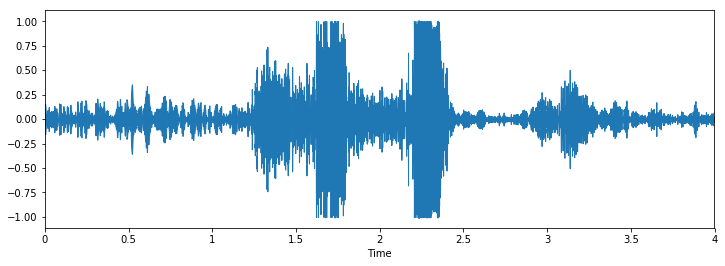

In [26]:
#Dog bark
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\4.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

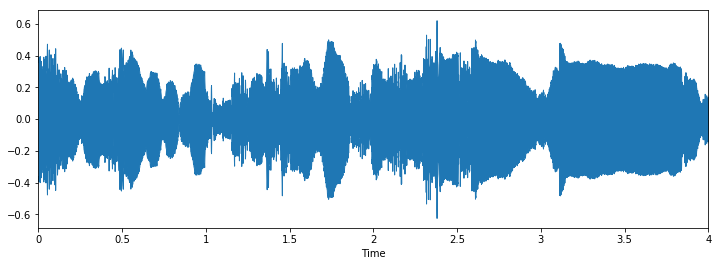

In [30]:
#siren
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\3.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

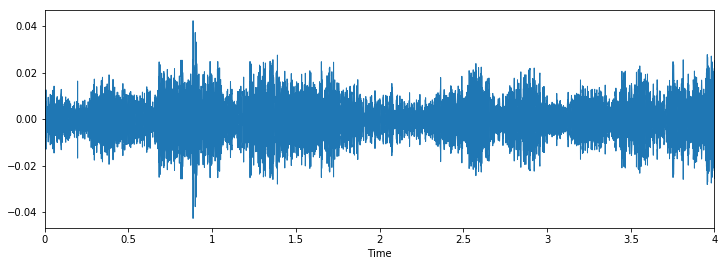

In [33]:
#children playing
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\44.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

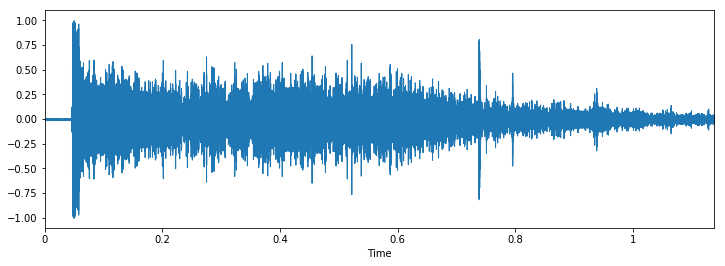

In [34]:
#gunshot
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\12.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

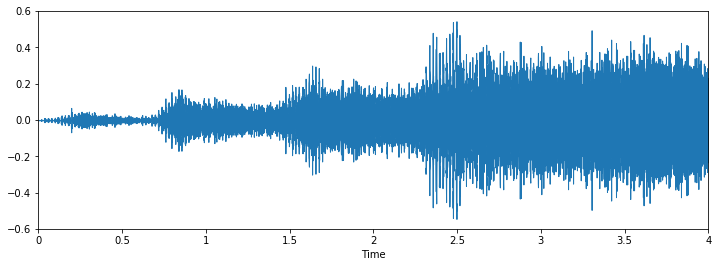

In [35]:
#drilling
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\2.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

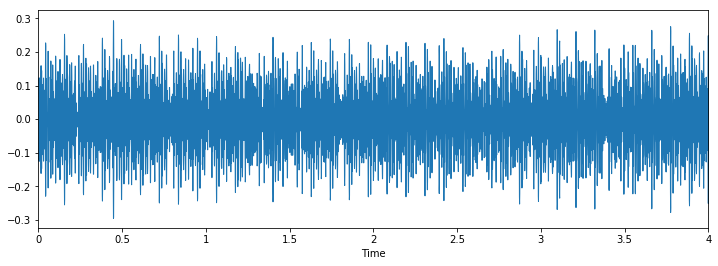

In [37]:
#engine_idling
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\26.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

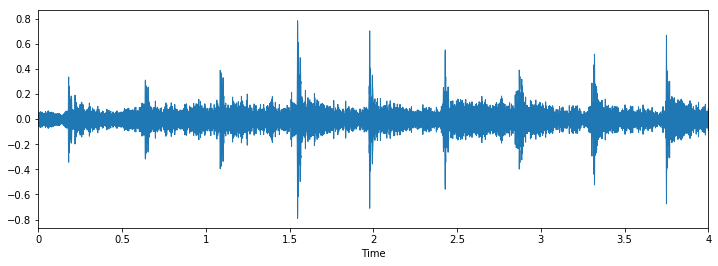

In [38]:
#air_conditioner
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\22.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

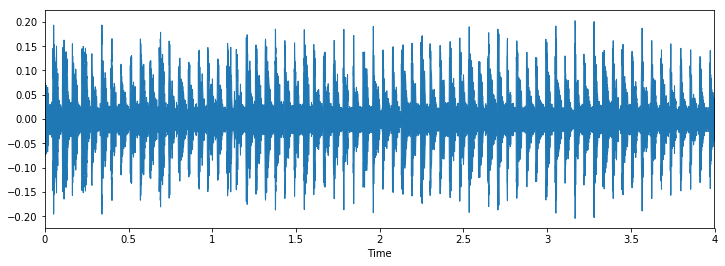

In [40]:
#jackhammer
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\37.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

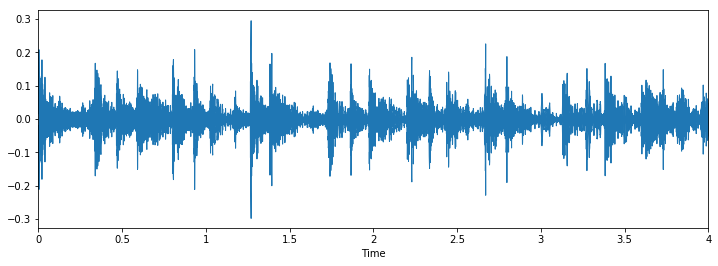

In [41]:
#street music
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\38.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

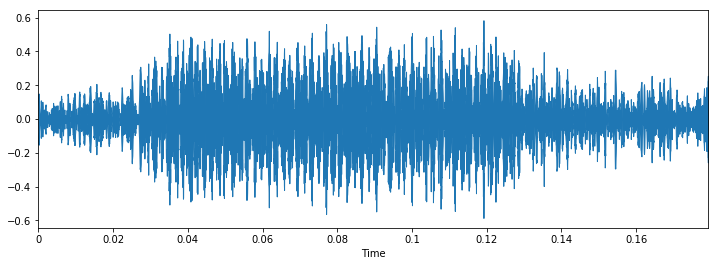

In [42]:
#car horn
file = r'C:\Users\swbatta\Documents\ML Guild contest\Urban Sound Classification\Data\Train\48.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(file)
_=librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file)

# Data pre-processing and Feature extraction

Data preprocessing steps:

-Used soundfile library to read in the .wav files as librosa cannot handle 24 bit or higher
-Used librosa to resample it to 22kHz
-Used librosa to convert to Mono

Resultant signals: Mono, 22kHz


#### Feature Extraction: MFCC(Mel frequency Cepstral Coefficients)

Spectrogram: A spectrogram is a picture of sound. It shows the frequencies that make up the sound, from low to high, and how they change over time from left to right. 

MFCC: For each audio file in the dataset, we will extract an MFCC (meaning we have an image representation for each audio sample) and store it in a Panda Dataframe along with it’s classification label. For this we will use Librosa’s mfcc() function which generates an MFCC from time series audio data.

MFCC Vs Spectrogram: The main difference is that a spectrogram uses a linear spaced frequency scale (so each frequency bin is spaced an equal number of Hertz apart), whereas an MFCC uses a quasi-logarithmic spaced frequency scale, which is more similar to how the human auditory system processes sounds.

In [8]:
max_pad_len=174
#** Loading and extracting features
def extract_features(file_name):
#using soundfile to import the .wav files as librosa cannot handle 24 bit and higher. Using librosa to resample it to 22khz and convert evrything to mono.
   
    try:
        audio, sample_rate = sf.read(file_name, dtype='float32')
        audio = audio.T
        data_22k = librosa.resample(audio, sample_rate, 22050)
        data_22k_mono = librosa.to_mono(data_22k)

        mfccs = librosa.feature.mfcc(y=data_22k_mono, sr=sample_rate, n_mfcc=40)
          
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs=np.pad(mfccs,pad_width=((0,0),(0,pad_width)),mode='constant')
        #mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [9]:
# Iterate through each sound file and extract the features 
features_train = []
for index, row in train.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'train',str(row["ID"])+'.wav')
    
    class_label = row['Class']
    data = extract_features(file_name)
    
    features_train.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf_train = pd.DataFrame(features_train, columns=['feature','class_label'])

#pickle featuresdf_train

pickle.dump(featuresdf_train,open("featuresdf_train.dat","wb"))

#featuresdf_train=pickle.load(open("featuresdf_train.dat","rb"))

print('Finished feature extraction from ', len(featuresdf_train), ' files')


Finished feature extraction from  5435  files


In [10]:
features_test = []
for index, row in test.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'test',str(row["ID"])+'.wav')
    
    data = extract_features(file_name)
    
    features_test.append([data])

# Convert into a Panda dataframe 
featuresdf_test = pd.DataFrame(features_test, columns=['feature'])

#pickle featuresdf_test

pickle.dump(featuresdf_test,open("featuresdf_test.dat","wb"))

#featuresdf_test=pickle.load(open("featuresdf_test.dat","rb"))


print('Finished feature extraction from ', len(featuresdf_test), ' files')


C:\Users\swbatta\AppData\Local\Continuum\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


Finished feature extraction from  3297  files


In [11]:
#label encoder for class in train data


def one_hot_encode(data):
    labels = np.empty(0)
    n=LabelEncoder()
    data.loc[:,'label']=n.fit_transform(data.loc[:,'Class'])
    n_labels = len(data['label'])
    n_unique_labels = len(np.unique(data['label']))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), data.label] = 1

    return one_hot_encode

tr_labels = one_hot_encode(train)


In [49]:
#featuresdf_train=pickle.load(open("featuresdf_train.dat","rb"))

X = np.array(featuresdf_train.feature.tolist())
y_cat = np.array(featuresdf_train.class_label.tolist())
label_encoder = LabelEncoder()
y = np_utils.to_categorical(label_encoder.fit_transform(y_cat)) 



In [4]:
#pickle X and y
#pickle.dump(X,open("X.dat","wb"))

X=pickle.load(open("X.dat","rb"))

#pickle.dump(y,open("y.dat","wb"))

y=pickle.load(open("y.dat","rb"))


# Model building

In [45]:
#CNN Model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5',verbose=1,save_best_only=True)
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)


X1=x_train.reshape(x_train.shape[0],40,174,1)
X2=x_val.reshape(x_val.shape[0],40,174,1)
num_labels=10
num_epochs=72
batch_size_num=100


model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=X1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),dim_ordering="th"))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),dim_ordering="th"))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),dim_ordering="th"))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3),dim_ordering="th"))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


start=datetime.now()
model.fit(X1,y_train,batch_size=batch_size_num,epochs=num_epochs,validation_data=(X2,y_val))

duration = datetime.now()-start
print("Training completed in time:",duration)

C:\Users\swbatta\AppData\Local\Continuum\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(3, 3), data_format="channels_first")`


Instructions for updating:
Use tf.cast instead.


C:\Users\swbatta\AppData\Local\Continuum\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(3, 3), data_format="channels_first")`
C:\Users\swbatta\AppData\Local\Continuum\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(3, 3), data_format="channels_first")`
C:\Users\swbatta\AppData\Local\Continuum\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(3, 3), data_format="channels_first")`


Train on 4348 samples, validate on 1087 samples
Epoch 1/72
4348/4348 [==============================] - 32s 7ms/step - loss: 2.3956 - acc: 0.1394 - val_loss: 2.1693 - val_acc: 0.2272
Epoch 2/72
4348/4348 [==============================] - 32s 7ms/step - loss: 2.0758 - acc: 0.1989 - val_loss: 2.0345 - val_acc: 0.2999
Epoch 3/72
4348/4348 [==============================] - 33s 8ms/step - loss: 1.9221 - acc: 0.2787 - val_loss: 1.8781 - val_acc: 0.3588
Epoch 4/72
4348/4348 [==============================] - 34s 8ms/step - loss: 1.7015 - acc: 0.3758 - val_loss: 1.6615 - val_acc: 0.4443
Epoch 5/72
4348/4348 [==============================] - 34s 8ms/step - loss: 1.5517 - acc: 0.4381 - val_loss: 1.5042 - val_acc: 0.5198
Epoch 6/72
4348/4348 [==============================] - 32s 7ms/step - loss: 1.4329 - acc: 0.4874 - val_loss: 1.4643 - val_acc: 0.4913
Epoch 7/72
4348/4348 [==============================] - 35s 8ms/step - loss: 1.3587 - acc: 0.5175 - val_loss: 1.3295 - val_acc: 0.5787
Epoch 8

Epoch 61/72
4348/4348 [==============================] - 33s 8ms/step - loss: 0.5217 - acc: 0.8206 - val_loss: 0.5948 - val_acc: 0.8160
Epoch 62/72
4348/4348 [==============================] - 35s 8ms/step - loss: 0.4907 - acc: 0.8441 - val_loss: 0.6357 - val_acc: 0.7893
Epoch 63/72
4348/4348 [==============================] - 32s 7ms/step - loss: 0.4931 - acc: 0.8367 - val_loss: 0.6381 - val_acc: 0.7902
Epoch 64/72
4348/4348 [==============================] - 33s 8ms/step - loss: 0.5077 - acc: 0.8333 - val_loss: 0.5917 - val_acc: 0.8031
Epoch 65/72
4348/4348 [==============================] - 32s 7ms/step - loss: 0.4991 - acc: 0.8374 - val_loss: 0.5722 - val_acc: 0.8105
Epoch 66/72
4348/4348 [==============================] - 33s 7ms/step - loss: 0.4797 - acc: 0.8333 - val_loss: 0.5471 - val_acc: 0.8197
Epoch 67/72
4348/4348 [==============================] - 33s 8ms/step - loss: 0.4632 - acc: 0.8441 - val_loss: 0.6478 - val_acc: 0.7893
Epoch 68/72
4348/4348 [=========================

In [46]:
score = model.evaluate(X1, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X2, y_val, verbose=0)
print("Validation Accuracy: ", score[1])


Training Accuracy:  0.8829346825578614
Validation Accuracy:  0.8169273230167519


In [52]:

featuresdf_test=pickle.load(open("featuresdf_test.dat","rb"))

X_test = np.array(featuresdf_test.feature.tolist())
X_test1=X_test.reshape(X_test.shape[0],40,174,1)

y_test = model.predict_classes(X_test1)

pickle.dump(y_test,open("y_test_CNN6.dat","wb"))

#y_test=pickle.load(open("y_test.dat","rb"))
pred_proba=model.predict_proba(X_test1)
y_labels=label_encoder.inverse_transform(y_test)
df=pd.DataFrame(y_labels,pred_proba)
np.savetxt(fulldatasetpath + r'\y_test_CNN6.csv', df, delimiter=",",fmt='%s')
